# Data Preprocesing

## Data Cleaning

In [264]:
#import required libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import words
import re

In [265]:
# read the dataset and store it in a dataframe
file_path = "/Users/makchanna128gmail.com/Documents/GitHub/Job-Vis-2023-2024/Data/2021_2023_data.csv"
dataset = pd.read_csv(file_path)
data_origin = pd.DataFrame(dataset)
data_origin

,Unnamed: 0,jobUrl,job title,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,...,Industry,Qualification,Language,Location,Job Description,Job Requirement,Company Profile,Publish Date,Closing Date,Contact Info
0,0,https://www.camhr.com/a/job/10559094,Assistant Store Manager (Champion-Chip Mong 27...,"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Champion-Chip Mong 27...,Entry Level,~,~,Negotiable,Male/Female,...,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
1,1,https://www.camhr.com/a/job/10559095,Assistant Store Manager (Lyn Around),"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Lyn Around),Senior,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
2,2,https://www.camhr.com/a/job/10559096,Store Manager (LYN Brand-Prince Mall),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (LYN Brand-Prince Mall),Senior,3,~,Negotiable,~,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
3,3,https://www.camhr.com/a/job/10559097,Store Manager (Jelly Bunny),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (Jelly Bunny),Senior,3,~,Negotiable,~,...,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
4,4,https://www.camhr.com/a/job/10559098,"Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...","Jaspal Fashions (Cambodia) Co., Ltd.","Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...",Entry Level,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94621,31,https://www.camhr.com/a/job/10540232,បុគ្គលិកផ្នែករត់តុ Service Staff ($150-$170) ប...,Premium Care Business Consulting,បុគ្គលិកផ្នែករត់តុ Service Staff ($150-$170) ប...,Entry Level,~,3,<$200,Male/Female,...,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,NaN,NaN,NaN,Publish Date：Dec-31-2022,Closing Date：Jan-03-2023,Contact Information Belly (Mr.) HR Manager 06...
94622,32,https://www.camhr.com/a/job/10540233,Digital Marketing ($300-$350) Near Phsar Depo,Premium Care Business Consulting,Digital Marketing ($300-$350) Near Phsar Depo,Middle,1,3,$200-$500,Male/Female,...,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,#NAME?,- 1+ Years of Experience in Digital Marketing-...,NaN,Publish Date：Dec-31-2022,Closing Date：Dec-31-2022,Contact Information Belly (Mr.) HR Manager 06...
94623,33,https://www.camhr.com/a/job/10540234,Sales Manager ($500-$800)(ម៉ូតូ) ក្បែរវត្តសំពៅមាស,Premium Care Business Consulting,Sales Manager ($500-$800)(ម៉ូតូ) ក្បែរវត្ត

In [266]:
#Read CSV with Dictionary Reader
#with open(file_path, 'r') as csvfile:
   # reader = csv.DictReader(csvfile)
    #for head in reader:
       #print(dict(head))

In [267]:
# show the columns name of the dataframe
columns = data_origin.columns
columns

Index(['Unnamed: 0', 'jobUrl', 'job title', 'company_name', 'position',
       'Level', 'Year of Exp', 'Hiring', 'Salary', 'Sex', 'Age', 'Term',
       'Function/Category', 'Industry', 'Qualification', 'Language',
       'Location', 'Job Description', 'Job Requirement', 'Company Profile',
       'Publish Date', 'Closing Date', 'Contact Info'],
      dtype='object')

In [268]:
# Get overall information about the DataFrame
print(data_origin.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94626 entries, 0 to 94625
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94626 non-null  int64 
 1   jobUrl             94626 non-null  object
 2   job title          94626 non-null  object
 3   company_name       94624 non-null  object
 4   position           94626 non-null  object
 5   Level              94626 non-null  object
 6   Year of Exp        94626 non-null  object
 7   Hiring             94626 non-null  object
 8   Salary             94626 non-null  object
 9   Sex                94626 non-null  object
 10  Age                94626 non-null  object
 11  Term               94626 non-null  object
 12  Function/Category  94626 non-null  object
 13  Industry           94626 non-null  object
 14  Qualification      94626 non-null  object
 15  Language           94626 non-null  object
 16  Location           94626 non-null  objec

### Missing Value

In [269]:

# Define a list of values that should be considered as missing
missing_values = ["NA", "N/A", "--", "null", "NaN"]

# Replace the missing values with NaN
data_origin.replace(missing_values, pd.NA, inplace=True)

# Check the DataFrame for missing values
missing_checking = data_origin.isnull().sum()
print(missing_checking)

Unnamed: 0               0
jobUrl                   0
job title                0
company_name             2
position                 0
Level                    0
Year of Exp              0
Hiring                   0
Salary                   0
Sex                      0
Age                      0
Term                     0
Function/Category        0
Industry                 0
Qualification            0
Language                 0
Location                 0
Job Description       9156
Job Requirement       9135
Company Profile      21091
Publish Date             0
Closing Date             0
Contact Info             0
dtype: int64


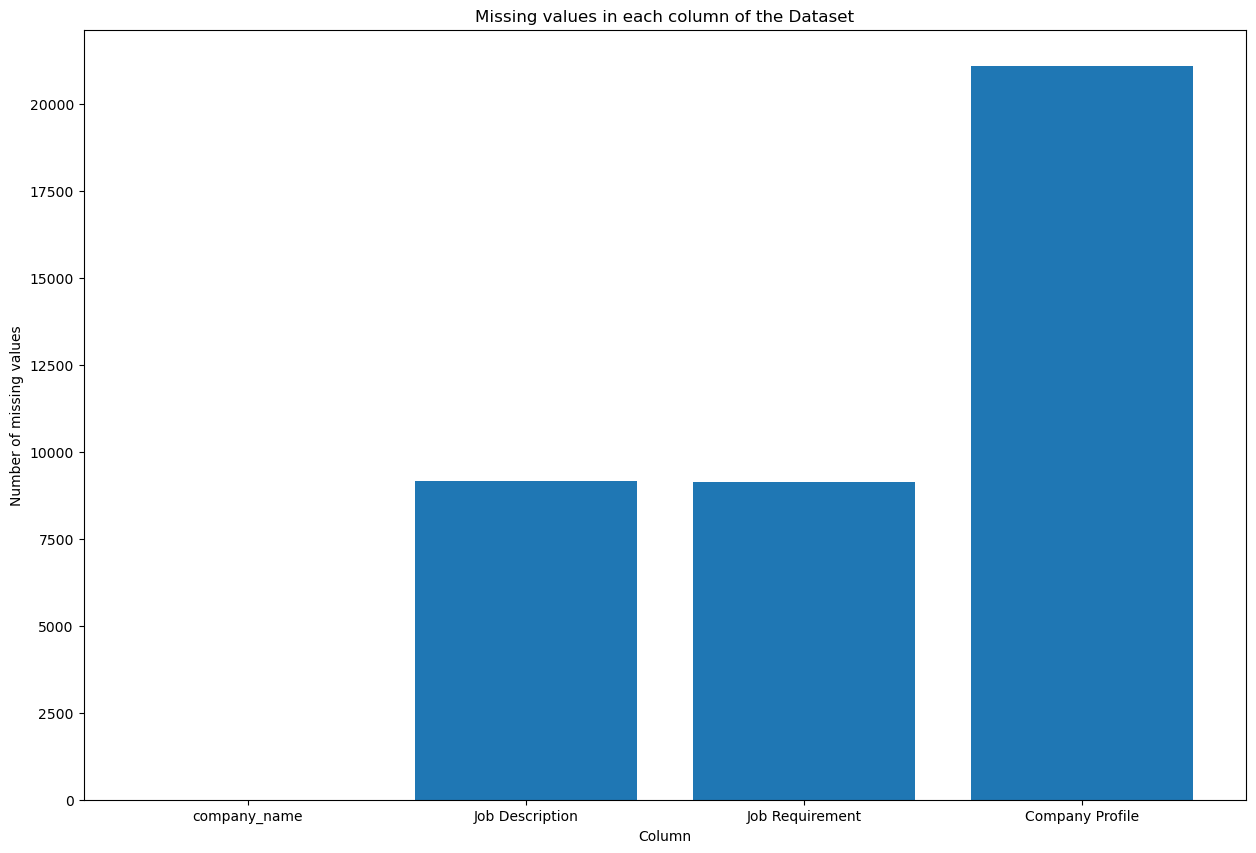

In [270]:
# Keep only the columns with missing values>0 
missing = missing_checking[missing_checking > 0] 
#Create a bar chart of the missing values
fig = plt.figure(figsize =(15, 10))

plt.bar(missing.index, missing.values)
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.title("Missing values in each column of the Dataset")
plt.show()

Calculate Percentage of Missing Value

In [271]:
# Total number of entries (rows X columns) in the dataset
total= data_origin.size
#Total number of missing values
missing_tot = missing_checking.sum()
# Calculate percentage of missing values
print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values")

The dataset contains 1.81 % missing values


In [272]:
#Remove Missing Value in our Dataset
new_data = data_origin.dropna()
print(new_data)

       Unnamed: 0                                jobUrl  \
0               0  https://www.camhr.com/a/job/10559094   
1               1  https://www.camhr.com/a/job/10559095   
2               2  https://www.camhr.com/a/job/10559096   
3               3  https://www.camhr.com/a/job/10559097   
4               4  https://www.camhr.com/a/job/10559098   
...           ...                                   ...   
94606          16  https://www.camhr.com/a/job/10540217   
94608          18  https://www.camhr.com/a/job/10540219   
94609          19  https://www.camhr.com/a/job/10540220   
94614          24  https://www.camhr.com/a/job/10540225   
94624          34  https://www.camhr.com/a/job/10540235   

                                               job title  \
0      Assistant Store Manager (Champion-Chip Mong 27...   
1                   Assistant Store Manager (Lyn Around)   
2                  Store Manager (LYN Brand-Prince Mall)   
3                            Store Manager (Jelly B

In [273]:
# Check the DataFrame for missing values
missing_checking = new_data.isnull().sum()
print(missing_checking)

Unnamed: 0           0
jobUrl               0
job title            0
company_name         0
position             0
Level                0
Year of Exp          0
Hiring               0
Salary               0
Sex                  0
Age                  0
Term                 0
Function/Category    0
Industry             0
Qualification        0
Language             0
Location             0
Job Description      0
Job Requirement      0
Company Profile      0
Publish Date         0
Closing Date         0
Contact Info         0
dtype: int64


### Duplicating Data

In [274]:
# Create Function to check for duplicate rows
def check_duplicating(input_data):
    duplicates = input_data.duplicated()
    
    # Count the number of duplicate rows
    duplicate_rows = input_data[duplicates]
    num_duplicates = duplicate_rows.shape[0]
    return num_duplicates


In [275]:
# print to check duplicating row
num_duplicates = check_duplicating(new_data)
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 114


In [276]:
#Remove duplication
data_unique = new_data.drop_duplicates()

 # print to check duplicating row
num_duplicates = check_duplicating(data_unique)
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [277]:
display(data_unique)

,Unnamed: 0,jobUrl,job title,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,...,Industry,Qualification,Language,Location,Job Description,Job Requirement,Company Profile,Publish Date,Closing Date,Contact Info
0,0,https://www.camhr.com/a/job/10559094,Assistant Store Manager (Champion-Chip Mong 27...,"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Champion-Chip Mong 27...,Entry Level,~,~,Negotiable,Male/Female,...,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
1,1,https://www.camhr.com/a/job/10559095,Assistant Store Manager (Lyn Around),"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Lyn Around),Senior,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
2,2,https://www.camhr.com/a/job/10559096,Store Manager (LYN Brand-Prince Mall),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (LYN Brand-Prince Mall),Senior,3,~,Negotiable,~,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
3,3,https://www.camhr.com/a/job/10559097,Store Manager (Jelly Bunny),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (Jelly Bunny),Senior,3,~,Negotiable,~,...,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
4,4,https://www.camhr.com/a/job/10559098,"Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...","Jaspal Fashions (Cambodia) Co., Ltd.","Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...",Entry Level,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94606,16,https://www.camhr.com/a/job/10540217,Sales Promotion Manager,CAMBREW LTD,Sales Promotion Manager,Middle,3,1,Negotiable,~,...,\n Food & Beverages\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,- Achieve region’s secondary sales target volu...,- University degree in Sales/Marketing or simi...,Cambrew Ltd. the largest and most modern brew...,Publish Date：Dec-31-2022,Closing Date：Jan-30-2023,Contact Information Human Resources Department...
94608,18,https://www.camhr.com/a/job/10540219,Trade Marketing Manager - CSD,CAMBREW LTD,Trade Marketing Manager - CSD,Senior,5,1,Negotiable,~,...,\n Food & Beverages\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,• Develops CSD/QSR channel marketing programs ...,"• Minimum bachelor’s degree in marketing, Busi...",Cambrew Ltd. the largest and most modern brew...,Publish Date：Dec-31-2022,Closing Date：Jan-30-2023,Contact Information Human Resources Department...
94609,19,https://www.camhr.com/a/job/10540220,Service Technician,CAMBREW LTD,Service Technician,Entry

In [278]:
# Convert value in Job title column to array
job_title = np.array(data_unique['job title'])
job_title

array(['Assistant Store Manager (Champion-Chip Mong 271 Mega Mall)',
       'Assistant Store Manager (Lyn Around)',
       'Store Manager (LYN Brand-Prince Mall)', ..., 'Service Technician',
       'SALES DEALER', 'Junior Accountant'], dtype=object)

In [279]:
# Convert value in Positions column to array
positions = np.array(data_unique['position'])
positions

array(['Assistant Store Manager (Champion-Chip Mong 271 Mega Mall)',
       'Assistant Store Manager (Lyn Around)',
       'Store Manager (LYN Brand-Prince Mall)', ..., 'Service Technician',
       'SALES DEALER', 'Junior Accountant'], dtype=object)

In [280]:
#checking value of both column
from collections import Counter
Counter(job_title == positions)

Counter({True: 67770})

In [281]:
# delete the column (Job title) and (Unnamed: 0)
new_data_unique= data_unique.drop(['jobUrl','job title','Unnamed: 0','Job Description','Job Requirement','Company Profile','Contact Info'],axis=1)
print(new_data_unique)

                               company_name  \
0      Jaspal Fashions (Cambodia) Co., Ltd.   
1      Jaspal Fashions (Cambodia) Co., Ltd.   
2      Jaspal Fashions (Cambodia) Co., Ltd.   
3      Jaspal Fashions (Cambodia) Co., Ltd.   
4      Jaspal Fashions (Cambodia) Co., Ltd.   
...                                     ...   
94606                           CAMBREW LTD   
94608                           CAMBREW LTD   
94609                           CAMBREW LTD   
94614                      C C E T CO.,LTD.   
94624                     CMED Construction   

                                                position        Level  \
0      Assistant Store Manager (Champion-Chip Mong 27...  Entry Level   
1                   Assistant Store Manager (Lyn Around)       Senior   
2                  Store Manager (LYN Brand-Prince Mall)       Senior   
3                            Store Manager (Jelly Bunny)       Senior   
4      Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...  Entry Level 

In [282]:
# df4 = pd.DataFrame(new_data)
# #df4.to_csv(r'output_newData.csv', index=False)
# display(df4)

## detect only english word

In [283]:
#downlaod english word 
nltk.download("words")

[nltk_data] Downloading package words to
[nltk_data]     /Users/makchanna128gmail.com/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [284]:

testing = pd.DataFrame(new_data_unique)
#for_testing = testing
for_testing = testing.head(100)

In [285]:
# def filter_english_nltk_checker(text):
#      english_words = set(words.words())
#      return ' '.join(word for word in text.lower().split() if word in english_words)

def filter_english(text):
    english_words = set(words.words())
    words_in_text = nltk.wordpunct_tokenize(text)
    english_words_in_text = [word.lower() for word in words_in_text if word.lower() in english_words]
    return ' '.join(english_words_in_text)


In [286]:
# data_column = 'company_name'
# # Apply the function to the TextColumn

# for column in new_data_unique.columns:
#     new_data_unique[column + data_column] = new_data_unique[column].apply(filter_english)

# # Display the result
# print(new_data_unique)

In [287]:
# # Apply the function to the TextColumn
# eng_detect = new_data_unique.copy()  # Create a full copy
# eng_detect['position'] = eng_detect['position'].apply(filter_english)


# # Display the result
# display(eng_detect)

#//////////////////////////////////////////////////

# Apply the function to the TextColumn
eng_detect = for_testing.copy()  # Create a full copy
eng_detect['position'] = eng_detect['position'].apply(filter_english)


# Display the result
display(eng_detect)

,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,Age,Term,Function/Category,Industry,Qualification,Language,Location,Publish Date,Closing Date
0,"Jaspal Fashions (Cambodia) Co., Ltd.",assistant store manager champion chip mong mall,Entry Level,~,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-23-2023,Closing Date：Jun-22-2023
1,"Jaspal Fashions (Cambodia) Co., Ltd.",assistant store manager around,Senior,2,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-23-2023,Closing Date：Jun-22-2023
2,"Jaspal Fashions (Cambodia) Co., Ltd.",store manager brand prince mall,Senior,3,~,Negotiable,~,Age Unlimited,\n Full Time\n,\n Sales\n,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-23-2023,Closing Date：Jun-22-2023
3,"Jaspal Fashions (Cambodia) Co., Ltd.",store manager jelly bunny,Senior,3,~,Negotiable,~,Age Unlimited,\n Full Time\n,\n Sales\n,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-23-2023,Closing Date：Jun-22-2023
4,"Jaspal Fashions (Cambodia) Co., Ltd.",store supervisor champion jelly bunny,Entry Level,2,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-23-2023,Closing Date：Jun-22-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Y Chhe Group,fleet,Middle,3,1,Negotiable,Male/Female,25 ~ 45,\n Full Time\n,\n Administration\n,\n Architecture/Building/Construction...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-24-2023,Closing Date：Jun-23-2023
201,Y Chhe Group,sale depot manager,Top,5,1,Negotiable,Male,25 ~ 45,\n Full Time\n,\n Sales\n,\n Architecture/Building/Construction...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-24-2023,Closing Date：Jun-23-2023
202,Y Chhe Group,officer,Fresh Graduate,2,1,Negotiable,Male/Female,20 ~ 35,\n Full Time\n,\n Driver/Security\n,\n Architecture/Building/Construction...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Publish Date：May-24-2023,Closing Date：Jun-23-2023
203,Y Chhe Group,senior legal officer,Senior,4,1,Negotiable,Male/Female,25 ~ 40,\n Full Time\n,\n Lawyer/Legal Service\n,\n Architecture/Building/Construction...,\n Bachelor Degree\n,\n English-- Excellent\n,\n Phnom Penh，Phnom Penh\n,Publish Date：May-24-2023,Closing Date：Jun-23-2023


In [288]:
missing_checking = eng_detect.isnull().sum()
# Check the DataFrame for missing values
print(missing_checking)

company_name         0
position             0
Level                0
Year of Exp          0
Hiring               0
Salary               0
Sex                  0
Age                  0
Term                 0
Function/Category    0
Industry             0
Qualification        0
Language             0
Location             0
Publish Date         0
Closing Date         0
dtype: int64


In [289]:


def clean_text(column):
    #Cleans text by removing common patterns and inconsistencies.

    patterns_to_remove = [
        r"\(.*\)",  # Remove text within parentheses
        r"\(\)",  # Remove empty parentheses
        r"\b(?:Co|Pte|Ltd|PLC|Plc|INC|Corp|LTD|co|ltd|CO|Limited)\b.*",  # Remove company suffixes
        r"\n",  # Remove newlines
        r"--+",  # Remove multiple hyphens
        r"-",  # Remove single hyphens
        r"~",
        r"\.",  # Remove periods
        r",",  # Remove commas
        r"\b(?:Good|Excellent|Mother Tongue|Fair)\b", # Remove specific words
        
    ]

    cleaned_column = column.str.replace("|".join(patterns_to_remove), "", regex=True).str.strip()
    return cleaned_column



In [290]:

# Specify columns to clean and their new names concisely:
columns_to_clean = ['company_name', 'Term', 'position', 'Industry', 'Function/Category', 'Qualification', 'Location', 'Language']
new_column_names = ['Company Name', 'Job_Type', 'Position', 'Industry', 'Job_Categories', 'Qualification', 'Location', 'Language']

# Clean and rename columns in a single loop:
for old_name, new_name in zip(columns_to_clean, new_column_names):
    eng_detect[new_name] = clean_text(eng_detect[old_name])
    #del eng_detect[old_name]
 
 


In [291]:
display(eng_detect)

,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,Age,Term,Function/Category,Industry,Qualification,Language,Location,Publish Date,Closing Date,Company Name,Job_Type,Position,Job_Categories
0,"Jaspal Fashions (Cambodia) Co., Ltd.",assistant store manager champion chip mong mall,Entry Level,~,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,General Business Services,High School,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Jaspal Fashions,Full Time,assistant store manager champion chip mong mall,Sales
1,"Jaspal Fashions (Cambodia) Co., Ltd.",assistant store manager around,Senior,2,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Wholesale/Retail,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Jaspal Fashions,Full Time,assistant store manager around,Sales
2,"Jaspal Fashions (Cambodia) Co., Ltd.",store manager brand prince mall,Senior,3,~,Negotiable,~,Age Unlimited,\n Full Time\n,\n Sales\n,Wholesale/Retail,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Jaspal Fashions,Full Time,store manager brand prince mall,Sales
3,"Jaspal Fashions (Cambodia) Co., Ltd.",store manager jelly bunny,Senior,3,~,Negotiable,~,Age Unlimited,\n Full Time\n,\n Sales\n,General Business Services,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Jaspal Fashions,Full Time,store manager jelly bunny,Sales
4,"Jaspal Fashions (Cambodia) Co., Ltd.",store supervisor champion jelly bunny,Entry Level,2,~,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Wholesale/Retail,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Jaspal Fashions,Full Time,store supervisor champion jelly bunny,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Y Chhe Group,fleet,Middle,3,1,Negotiable,Male/Female,25 ~ 45,\n Full Time\n,\n Administration\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh,Publish Date：May-24-2023,Closing Date：Jun-23-2023,Y Chhe Group,Full Time,fleet,Administration
201,Y Chhe Group,sale depot manager,Top,5,1,Negotiable,Male,25 ~ 45,\n Full Time\n,\n Sales\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh,Publish Date：May-24-2023,Closing Date：Jun-23-2023,Y Chhe Group,Full Time,sale depot manager,Sales
202,Y Chhe Group,officer,Fresh Graduate,2,1,Negotiable,Male/Female,20 ~ 35,\n Full Time\n,\n Driver/Security\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh,Publish Date：May-24-2023,Closing Date：Jun-23-2023,Y Chhe Group,Full Time,officer,Driver/Security
203,Y Chhe Group,senior legal officer,Senior,4,1,Negotiable,Male/Female,25 ~ 40,\n Full Time\n,\n Lawyer/Legal Service\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh，Phnom Penh,Publish Date：May-24-2023,Closing Date：Jun-23-2023,Y Chhe Group,Full Time,senior legal officer,Lawyer/Legal Service


In [292]:
eng_detect['Publish Date']= eng_detect['Publish Date'].str.replace(r'Publish Date：', '', regex=True)
eng_detect['Closing Date']= eng_detect['Closing Date'].str.replace(r'Closing Date：', '', regex=True)


In [293]:
#Cleaning and Refomating Date of publishing and closing date
# Columns to reformat as datetime:
date_columns = ['Publish Date', 'Closing Date']

# Reformat dates in a single line:
for col in date_columns:
    eng_detect[col] = pd.to_datetime(eng_detect[col], errors='coerce')
eng_detect.info()

print(eng_detect)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_name       100 non-null    object        
 1   position           100 non-null    object        
 2   Level              100 non-null    object        
 3   Year of Exp        100 non-null    object        
 4   Hiring             100 non-null    object        
 5   Salary             100 non-null    object        
 6   Sex                100 non-null    object        
 7   Age                100 non-null    object        
 8   Term               100 non-null    object        
 9   Function/Category  100 non-null    object        
 10  Industry           100 non-null    object        
 11  Qualification      100 non-null    object        
 12  Language           100 non-null    object        
 13  Location           100 non-null    object        
 14  Publish Date   

In [294]:
# Display the cleaned data as a table
new_table= eng_detect[['Position','Company Name', 'Level', 'Year of Exp', 'Hiring', 'Salary',
       'Sex', 'Age', 'Job_Type','Industry','Job_Categories','Qualification','Language','Location','Publish Date','Closing Date']]

display(new_table)
new_table.info()
# new_table = pd.DataFrame(new_table)


,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,~,~,Negotiable,Male/Female,Age Unlimited,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Wholesale/Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,Wholesale/Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
3,store manager jelly bunny,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,General Business Services,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
4,store supervisor champion jelly bunny,Jaspal Fashions,Entry Level,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Wholesale/Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,fleet,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,25 ~ 45,Full Time,Architecture/Building/Construction,Administration,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
201,sale depot manager,Y Chhe Group,Top,5,1,Negotiable,Male,25 ~ 45,Full Time,Architecture/Building/Construction,Sales,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
202,officer,Y Chhe Group,Fresh Graduate,2,1,Negotiable,Male/Female,20 ~ 35,Full Time,Architecture/Building/Construction,Driver/Security,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,25 ~ 40,Full Time,Architecture/Building/Construction,Lawyer/Legal Service,Bachelor Degree,English,Phnom Penh，Phnom Penh,2023-05-24,2023-06-23


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Position        100 non-null    object        
 1   Company Name    100 non-null    object        
 2   Level           100 non-null    object        
 3   Year of Exp     100 non-null    object        
 4   Hiring          100 non-null    object        
 5   Salary          100 non-null    object        
 6   Sex             100 non-null    object        
 7   Age             100 non-null    object        
 8   Job_Type        100 non-null    object        
 9   Industry        100 non-null    object        
 10  Job_Categories  100 non-null    object        
 11  Qualification   100 non-null    object        
 12  Language        100 non-null    object        
 13  Location        100 non-null    object        
 14  Publish Date    100 non-null    datetime64[ns]
 15  Closing Dat

In [295]:
#Removing Missing Value in our Dataset
new_table_unique_data = new_table.dropna()
print(new_table_unique_data)                                                        

                                            Position     Company Name  \
0    assistant store manager champion chip mong mall  Jaspal Fashions   
1                     assistant store manager around  Jaspal Fashions   
2                    store manager brand prince mall  Jaspal Fashions   
3                          store manager jelly bunny  Jaspal Fashions   
4              store supervisor champion jelly bunny  Jaspal Fashions   
..                                               ...              ...   
200                                            fleet     Y Chhe Group   
201                               sale depot manager     Y Chhe Group   
202                                          officer     Y Chhe Group   
203                             senior legal officer     Y Chhe Group   
204                          quality control manager     Y Chhe Group   

              Level Year of Exp Hiring       Salary          Sex  \
0       Entry Level           ~      ~  Negotiable   Ma

In [296]:
missing_checking = new_table_unique_data.isnull().sum()
# Check the DataFrame for missing values
print(missing_checking)

Position          0
Company Name      0
Level             0
Year of Exp       0
Hiring            0
Salary            0
Sex               0
Age               0
Job_Type          0
Industry          0
Job_Categories    0
Qualification     0
Language          0
Location          0
Publish Date      0
Closing Date      0
dtype: int64


In [297]:
#create Dataframe
data_to_split = pd.DataFrame(new_table_unique_data)


# Split 'Language' column into a list and and Convert list into multiple rows
data_to_split['Industry'] = data_to_split['Industry'].str.split('/')
industry_split = data_to_split.explode('Industry')

# Split 'Language' column into a list and and Convert list into multiple rows
industry_split['Job_Categories'] = industry_split['Job_Categories'].str.split('/')
Job_Categories_split = industry_split.explode('Job_Categories')

# Split 'Language' column into a list and and Convert list into multiple rows
Job_Categories_split['Language'] = Job_Categories_split['Language'].str.split(' ')
language_split = Job_Categories_split.explode('Language')

# Split 'Location' column into a list and and Convert list into multiple rows
language_split['Location'] = language_split['Location'].str.split('，')
result_split = language_split.explode('Location')

display(result_split)

,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,~,~,Negotiable,Male/Female,Age Unlimited,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,25 ~ 40,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,25 ~ 40,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,22 ~ 40,Full Time,Architecture,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,22 ~ 40,Full Time,Building,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23


In [298]:

def extract_chinese(text):
    if text == "ChineseMandarin":
        return "Chinese"
    else:
        return text

# Apply the function to the "language" column
result_split['Language'] = result_split['Language'].apply(extract_chinese)

display(result_split)



,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,~,~,Negotiable,Male/Female,Age Unlimited,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,Age Unlimited,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,Age Unlimited,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,25 ~ 40,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,25 ~ 40,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,22 ~ 40,Full Time,Architecture,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,22 ~ 40,Full Time,Building,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23


Age columns cleaning

In [300]:
# Replace "Age Unlimited" with 18 (optional)
result_split['Age'] = result_split['Age'].str.replace(r'Age Unlimited', '18', regex=True)

# Extract age ranges and calculate averages
age_ranges = result_split['Age']
calculated_ages = []

for age_range in age_ranges:
    if "~" in age_range:
        start_age, end_age = age_range.split("~")
        average_age = int((int(start_age) + int(end_age)) / 2)
    else:
        average_age = int(age_range)
    calculated_ages.append(average_age)

# Apply calculated ages to the "Age" column (assumes 'Age' is numeric)
# result_split['Age'] = calculated_ages
# Create a new column for calculated averages
result_split['Age'] = calculated_ages

# Replace 18 year old by Undefined
result_split['Age'].replace('18','Undefined', inplace=True) 

# Display the modified DataFrame
display(result_split)

,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,~,~,Negotiable,Male/Female,18,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,~,Negotiable,Male/Female,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,store manager brand prince mall,Jaspal Fashions,Senior,3,~,Negotiable,~,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,32,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
203,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Male/Female,32,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,31,Full Time,Architecture,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
204,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Male/Female,31,Full Time,Building,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23


In [301]:

# Replace Male\female or ~ by Both
#convert data type from object to integer(int 64 dtype) in Hiring and Year of Experience columns

column_names = ['Hiring', 'Year of Exp']
result_split[column_names] = result_split[column_names].replace('~','1', regex=True)
result_split[column_names] = result_split[column_names].apply(pd.to_numeric, errors='raise')
result_of_splitting_text = result_split.reset_index(drop=True)
result_of_splitting_text.info()
print(result_of_splitting_text[['Hiring', 'Year of Exp']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Position        390 non-null    object        
 1   Company Name    390 non-null    object        
 2   Level           390 non-null    object        
 3   Year of Exp     390 non-null    int64         
 4   Hiring          390 non-null    int64         
 5   Salary          390 non-null    object        
 6   Sex             390 non-null    object        
 7   Age             390 non-null    int64         
 8   Job_Type        390 non-null    object        
 9   Industry        390 non-null    object        
 10  Job_Categories  390 non-null    object        
 11  Qualification   390 non-null    object        
 12  Language        390 non-null    object        
 13  Location        390 non-null    object        
 14  Publish Date    390 non-null    datetime64[ns]
 15  Closin

In [302]:

# Assuming you have a DataFrame named 'result_split' with a column named 'Sex'
result_of_splitting_text['Sex'] = result_of_splitting_text['Sex'].str.replace('Male/Female', 'Both', regex=True) .str.replace('~', 'Both', regex=True)
# Display the modified DataFrame
display(result_of_splitting_text)


,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,1,1,Negotiable,Both,18,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,1,Negotiable,Both,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,assistant store manager around,Jaspal Fashions,Senior,2,1,Negotiable,Both,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
3,store manager brand prince mall,Jaspal Fashions,Senior,3,1,Negotiable,Both,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
4,store manager brand prince mall,Jaspal Fashions,Senior,3,1,Negotiable,Both,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Both,32,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
386,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Both,32,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
387,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Both,31,Full Time,Architecture,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
388,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Both,31,Full Time,Building,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23


In [303]:
# Replace whitespace values with NaN in all string-type columns:
# Handles empty strings
result_of_splitting_text.replace(r'^\s*$', np.nan, regex=True,inplace=True)  
# Handles single spaces
result_of_splitting_text.replace(' ', np.nan,inplace=True) 

# check missing value rows
missing_checking = result_of_splitting_text.isnull().sum()
print(missing_checking)

# print to check duplicating value rows
num_duplicates = check_duplicating(result_of_splitting_text)
print("Number of duplicate rows:", num_duplicates)

Position          11
Company Name       0
Level              0
Year of Exp        0
Hiring             0
Salary             0
Sex                0
Age                0
Job_Type           0
Industry           0
Job_Categories     0
Qualification      6
Language          37
Location           0
Publish Date       0
Closing Date       0
dtype: int64
Number of duplicate rows: 49


In [304]:
# Clean and transform data
#Remove duplicate and missing value
missing_splitting_text = result_of_splitting_text.dropna()
cleaning_splitting_text = missing_splitting_text.drop_duplicates()

result = cleaning_splitting_text.reset_index(drop=True)

# check missing value rows
missing_checking = result.isnull().sum()
print(missing_checking)

# print to check duplicating value rows
num_duplicates = check_duplicating(cleaning_splitting_text)
print("Number of duplicate rows:", num_duplicates)

display(result)
result.info()

Position          0
Company Name      0
Level             0
Year of Exp       0
Hiring            0
Salary            0
Sex               0
Age               0
Job_Type          0
Industry          0
Job_Categories    0
Qualification     0
Language          0
Location          0
Publish Date      0
Closing Date      0
dtype: int64
Number of duplicate rows: 0


,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,assistant store manager champion chip mong mall,Jaspal Fashions,Entry Level,1,1,Negotiable,Both,18,Full Time,General Business Services,Sales,High School,English,Phnom Penh,2023-05-23,2023-06-22
1,assistant store manager around,Jaspal Fashions,Senior,2,1,Negotiable,Both,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
2,assistant store manager around,Jaspal Fashions,Senior,2,1,Negotiable,Both,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
3,store manager brand prince mall,Jaspal Fashions,Senior,3,1,Negotiable,Both,18,Full Time,Wholesale,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
4,store manager brand prince mall,Jaspal Fashions,Senior,3,1,Negotiable,Both,18,Full Time,Retail,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Both,32,Full Time,Construction,Lawyer,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
294,senior legal officer,Y Chhe Group,Senior,4,1,Negotiable,Both,32,Full Time,Construction,Legal Service,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
295,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Both,31,Full Time,Architecture,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23
296,quality control manager,Y Chhe Group,Top,3,1,Negotiable,Both,31,Full Time,Building,Others,Bachelor Degree,English,Phnom Penh,2023-05-24,2023-06-23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Position        298 non-null    object        
 1   Company Name    298 non-null    object        
 2   Level           298 non-null    object        
 3   Year of Exp     298 non-null    int64         
 4   Hiring          298 non-null    int64         
 5   Salary          298 non-null    object        
 6   Sex             298 non-null    object        
 7   Age             298 non-null    int64         
 8   Job_Type        298 non-null    object        
 9   Industry        298 non-null    object        
 10  Job_Categories  298 non-null    object        
 11  Qualification   298 non-null    object        
 12  Language        298 non-null    object        
 13  Location        298 non-null    object        
 14  Publish Date    298 non-null    datetime64[ns]
 15  Closin

Export Data clean as CSV file

In [305]:
#Export as CSV file
result.to_csv(r"/Users/makchanna128gmail.com/Documents/GitHub/Job-Vis-2023-2024/Data_clean_new2.csv", index=False)
result.shape

(298, 16)